In [1]:
from requests import Request, Session
import pandas as pd
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

**Connecting to CoinMarketCap API**

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-03-12T21:00:32.033Z', 'error_code': 0, 'error_message': None, 'elapsed': 47, 'credit_count': 1, 'notice': None, 'total_count': 9058}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10089, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [4]:
df = pd.json_normalize(data['data'])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10089,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.931572e+07,1.931572e+07,...,4.143642e+11,42.0945,4.504956e+11,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6569,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,...,1.905660e+11,19.3699,1.905660e+11,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,49160,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.211671e+10,7.314177e+10,...,7.291963e+10,7.4078,7.395610e+10,None,2023-03-12T20:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1211,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578927e+08,1.599800e+08,...,4.479478e+10,4.5531,4.538696e+10,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,10563,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.064535e+10,4.064535e+10,...,3.941774e+10,4.0019,3.941774e+10,None,2023-03-12T20:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,...,1.860384e+10,1.8910,3.651326e+10,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN
6,2010,Cardano,ADA,cardano,672,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.469517e+10,3.557370e+10,...,1.117175e+10,1.1349,1.448988e+10,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN
7,3890,Polygon,MATIC,polygon,608,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,...,9.736263e+09,0.9896,1.114714e+10,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,656,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,9.212792e+09,0.9359,9.212792e+09,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN
9,4687,Binance USD,BUSD,binance-usd,6411,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,8.375924e+09,8.375924e+09,...,8.432878e+09,0.8567,8.432878e+09,None,2023-03-12T20:59:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1


In [5]:
#This allows me to see all the columns and rows not just like 15
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#df

In [6]:
#Creating a TimeStamp Column 

df['timestamp'] = pd.to_datetime('now')
df

C:\Users\hebaa\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10089,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.931572e+07,1.931572e+07,...,42.0945,4.504956e+11,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:02:28.933069
1,1027,Ethereum,ETH,ethereum,6569,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,...,19.3699,1.905660e+11,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:02:28.933069
2,825,Tether,USDT,tether,49160,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.211671e+10,7.314177e+10,...,7.4078,7.395610e+10,None,2023-03-12T20:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-12 21:02:28.933069
3,1839,BNB,BNB,bnb,1211,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578927e+08,1.599800e+08,...,4.5531,4.538696e+10,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:02:28.933069
4,3408,USD Coin,USDC,usd-coin,10563,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.064535e+10,4.064535e+10,...,4.0019,3.941774e+10,None,2023-03-12T20:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-12 21:02:28.933069
5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,...,1.8910,3.651326e+10,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:02:28.933069
6,2010,Cardano,ADA,cardano,672,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.469517e+10,3.557370e+10,...,1.1349,1.448988e+10,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:02:28.933069
7,3890,Polygon,MATIC,polygon,608,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,...,0.9896,1.114714e+10,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:02:28.933069
8,74,Dogecoin,DOGE,dogecoin,656,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,0.9359,9.212792e+09,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:02:28.933069
9,4687,Binance USD,BUSD,binance-usd,6411,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,8.375924e+09,8.375924e+09,...,0.8567,8.432878e+09,None,2023-03-12T20:59:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-03-12 21:02:28.933069


In [7]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df=df.append(df2)

In [8]:
# Recalling the api_runner function every minute!
import os 
from time import time 
from time import sleep
for i in range(333):
    api_runner()
    print('API runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\hebaa\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\hebaa\AppData\Local\Temp\ipykernel_8288\1832035505.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2)


API runner completed successfully


C:\Users\hebaa\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\hebaa\AppData\Local\Temp\ipykernel_8288\1832035505.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2)


API runner completed successfully


C:\Users\hebaa\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\hebaa\AppData\Local\Temp\ipykernel_8288\1832035505.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2)


API runner completed successfully


C:\Users\hebaa\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\hebaa\AppData\Local\Temp\ipykernel_8288\1832035505.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2)


API runner completed successfully


C:\Users\hebaa\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\hebaa\AppData\Local\Temp\ipykernel_8288\1832035505.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(df2)


API runner completed successfully


KeyboardInterrupt: 

In [10]:
df.head(50)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10089,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.931572e+07,1.931572e+07,...,42.0945,4.504956e+11,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:02:28.933069
1,1027,Ethereum,ETH,ethereum,6569,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,...,19.3699,1.905660e+11,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:02:28.933069
2,825,Tether,USDT,tether,49160,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.211671e+10,7.314177e+10,...,7.4078,7.395610e+10,None,2023-03-12T20:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-12 21:02:28.933069
3,1839,BNB,BNB,bnb,1211,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578927e+08,1.599800e+08,...,4.5531,4.538696e+10,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:02:28.933069
4,3408,USD Coin,USDC,usd-coin,10563,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.064535e+10,4.064535e+10,...,4.0019,3.941774e+10,None,2023-03-12T20:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-12 21:02:28.933069
5,52,XRP,XRP,xrp,903,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,...,1.8910,3.651326e+10,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:02:28.933069
6,2010,Cardano,ADA,cardano,672,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.469517e+10,3.557370e+10,...,1.1349,1.448988e+10,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:02:28.933069
7,3890,Polygon,MATIC,polygon,608,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,...,0.9896,1.114714e+10,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:02:28.933069
8,74,Dogecoin,DOGE,dogecoin,656,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,...,0.9359,9.212792e+09,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:02:28.933069
9,4687,Binance USD,BUSD,binance-usd,6411,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,8.375924e+09,8.375924e+09,...,0.8567,8.432878e+09,None,2023-03-12T20:59:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-03-12 21:02:28.933069


In [34]:
#saving file into csv
df.to_csv(r'D:\hopfully a career\Projects\Automate Api Extraction\api2.csv',mode='a',header=True)

In [11]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10089,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19315725.00000,19315725.00000,...,42.09450,450495589881.35999,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:02:28.933069
1,1027,Ethereum,ETH,ethereum,6569,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,...,19.36990,190565968539.48999,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:02:28.933069
2,825,Tether,USDT,tether,49160,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,72116708664.75655,73141766321.23428,...,7.40780,73956100648.50000,None,2023-03-12T20:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-12 21:02:28.933069
3,1839,BNB,BNB,bnb,1211,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157892664.71611,159979963.59043,...,4.55310,45386958739.64000,None,2023-03-12T20:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:02:28.933069
4,3408,USD Coin,USDC,usd-coin,10563,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,40645352127.66054,40645352127.66054,...,4.00190,39417744587.29000,None,2023-03-12T20:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-12 21:02:28.933069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,5426,Solana,SOL,solana,439,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,382958926.48138,539312704.88753,...,0.73700,10242423102.25000,None,2023-03-12T21:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:06:44.994207
11,6636,Polkadot,DOT,polkadot-new,479,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1165463061.06482,1291886731.37000,...,0.67960,7431801826.63000,None,2023-03-12T21:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-12 21:06:44.994207
12,4943,Dai,DAI,multi-collateral-dai,1968,2019-11-22T00:00:00.000Z,"[defi, stablecoin, asset-backed-stablecoin, et...",NaN,6419725644.95861,6419725644.95861,...,0.63180,6234485775.93000,None,2023-03-12T21:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2023-03-12 21:06:44.994207
13,5994,Shiba Inu,SHIB,shiba-inu,493,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,549063278876301.93750,589735030408322.75000,...,0.58760,6226491495.42000,None,2023-03-12T21:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2023-03-12 21:06:44.994207


In [12]:
# How much the price of the coins has changed over the time
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.71723,4.13858,-4.40435,-1.40733,22.14081,25.28532
Ethereum,1.31497,5.19084,-0.92660,1.58653,15.88620,23.22453
Tether,-0.23274,0.21291,1.12958,1.12720,1.13384,1.12965
BNB,0.71074,2.73168,-2.02918,-7.83692,1.60866,3.56514
USD Coin,0.48543,-1.18864,-2.92239,-2.92220,-2.91875,-2.93815
XRP,0.83420,-0.52327,-1.17920,-5.01793,-2.06865,-4.35945
Cardano,1.73883,4.43643,-4.78726,-11.69638,1.84256,5.63619
Polygon,2.11957,5.61289,-2.67084,-12.32392,28.98120,25.29594
Dogecoin,2.42960,4.63495,-7.68741,-15.88867,-9.52755,-21.63208


In [13]:
#To help me Visualize the data above i need something like pivottable!! let's try this 
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     1.71723
         quote.USD.percent_change_24h    4.13858
         quote.USD.percent_change_7d    -4.40435
         quote.USD.percent_change_30d   -1.40733
         quote.USD.percent_change_60d   22.14081
                                          ...   
TRON     quote.USD.percent_change_24h    4.40959
         quote.USD.percent_change_7d    -9.04836
         quote.USD.percent_change_30d   -3.35147
         quote.USD.percent_change_60d   11.30680
         quote.USD.percent_change_90d   16.04823
Length: 90, dtype: float64

In [14]:
type(df4)

pandas.core.series.Series

In [15]:
df4 = df4.to_frame(name='values')
df4

values
name                                         
Bitcoin quote.USD.percent_change_1h   1.71723
        quote.USD.percent_change_24h  4.13858
        quote.USD.percent_change_7d  -4.40435
        quote.USD.percent_change_30d -1.40733
        quote.USD.percent_change_60d 22.14081
...                                       ...
TRON    quote.USD.percent_change_24h  4.40959
        quote.USD.percent_change_7d  -9.04836
        quote.USD.percent_change_30d -3.35147
        quote.USD.percent_change_60d 11.30680
        quote.USD.percent_change_90d 16.04823

[90 rows x 1 columns]

In [16]:
df4.count()

values    90
dtype: int64

In [17]:
index = pd.Index(range(90))

df5=df4.set_index(index)
df5

,values
0,1.71723
1,4.13858
2,-4.40435
3,-1.40733
4,22.14081
...,...
85,4.40959
86,-9.04836
87,-3.35147
88,11.30680


In [18]:
df5=df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,1.71723
1,Bitcoin,quote.USD.percent_change_24h,4.13858
2,Bitcoin,quote.USD.percent_change_7d,-4.40435
3,Bitcoin,quote.USD.percent_change_30d,-1.40733
4,Bitcoin,quote.USD.percent_change_60d,22.14081
...,...,...,...
85,TRON,quote.USD.percent_change_24h,4.40959
86,TRON,quote.USD.percent_change_7d,-9.04836
87,TRON,quote.USD.percent_change_30d,-3.35147
88,TRON,quote.USD.percent_change_60d,11.30680


In [19]:
df6=df5.rename(columns={'level_1':'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.71723
1,Bitcoin,quote.USD.percent_change_24h,4.13858
2,Bitcoin,quote.USD.percent_change_7d,-4.40435
3,Bitcoin,quote.USD.percent_change_30d,-1.40733
4,Bitcoin,quote.USD.percent_change_60d,22.14081
...,...,...,...
85,TRON,quote.USD.percent_change_24h,4.40959
86,TRON,quote.USD.percent_change_7d,-9.04836
87,TRON,quote.USD.percent_change_30d,-3.35147
88,TRON,quote.USD.percent_change_60d,11.30680


In [20]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,1.71723
1,Bitcoin,24h,4.13858
2,Bitcoin,7d,-4.40435
3,Bitcoin,30d,-1.40733
4,Bitcoin,60d,22.14081
...,...,...,...
85,TRON,24h,4.40959
86,TRON,7d,-9.04836
87,TRON,30d,-3.35147
88,TRON,60d,11.30680


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

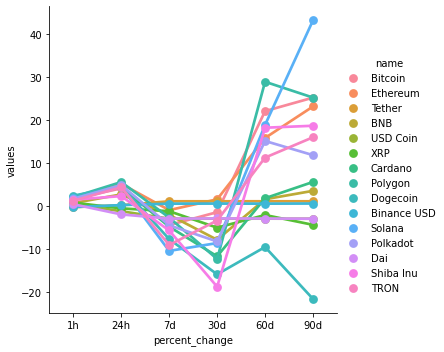

In [22]:
sns.catplot(x='percent_change',y='values',hue='name',data=df6,kind='point')